## Logistic Regression with cost and gradient from scratch
### Includes plotting

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
path = '/content/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

Text(0, 0.5, 'Exam 1 Score')

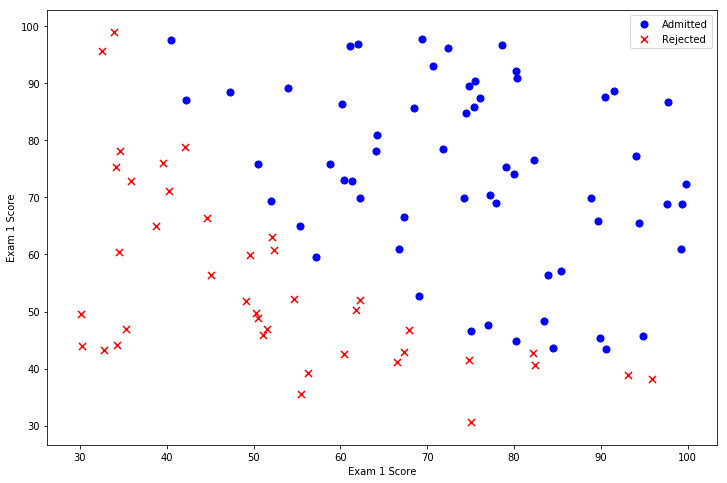

In [18]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 1 Score')

In [0]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad
  
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [0]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

In [0]:

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

#print(X.head())
#print(y.head())
# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [0]:
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)

In [23]:
cost(theta, X, y)

0.6931471805599453

In [24]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
print(result)
cost(result[0], X, y)

(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)


0.20349770158947458

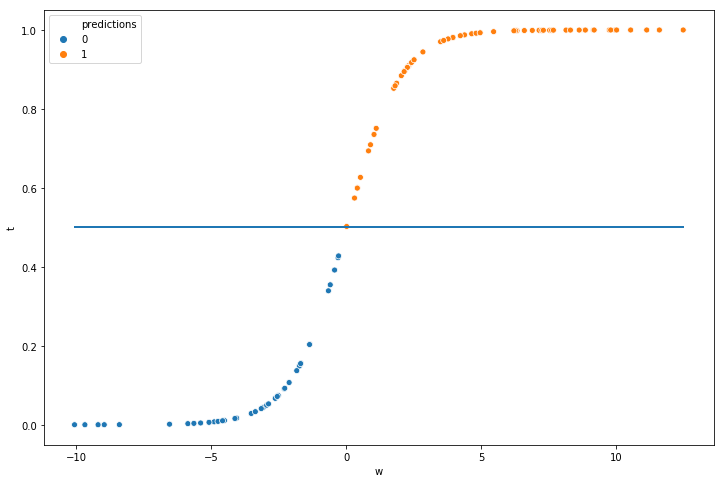

In [26]:
import seaborn as sns
w = np.squeeze(np.asarray((X * theta_min.T).reshape(1,-1)))
t = np.squeeze(np.asarray(sigmoid(X * theta_min.T).reshape(1,-1)))
iris_ = pd.DataFrame({"w":w,"t":t,"predictions":predictions})

fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(x='w', y='t',
              hue='predictions', data=iris_); 
ax.plot([np.min(w), np.max(w)], [0.5, 0.5], linewidth=2)

[-25.16131863   0.20623159   0.20147149]
-25.16131862777957 0.20623158859990537 0.2014714861690025


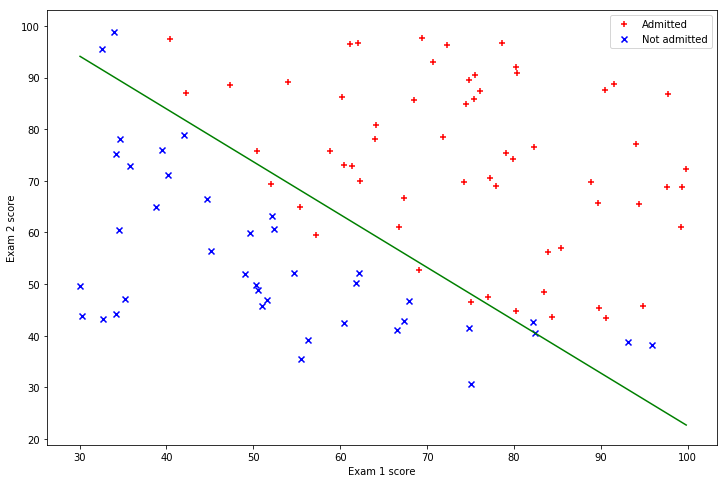

In [32]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
print(np.squeeze(np.asarray(theta_min.reshape(1,-1))))
theta_min = np.squeeze(np.asarray(theta_min.reshape(1,-1)))
print(theta_min[0],theta_min[1],theta_min[2])
y_value=-(theta_min[0] +theta_min[1]*x_value)/theta_min[2]

ax.plot(x_value,y_value, "g")
ax.set_xlabel("Exam 1 score")
ax.set_ylabel("Exam 2 score")
ax.legend(loc=0)

In [33]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 89%


**References** :

[*link 1*](https://github.com/Benlau93/Machine-Learning-by-Andrew-Ng-in-Python/blob/master/LogisticRegression/ML_LogisticRegression.ipynb)

[*John Wittenauer*](https://www.johnwittenauer.net/machine-learning-exercises-in-python-part-3/)

[*Benjamin Lau*](https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-regularized-logistic-regression-lasso-regression-721f311130fb)